<a href="https://colab.research.google.com/github/Fritz302/data-science/blob/main/FritKokiU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install preliz

import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


**Prior:**

Bronny James is the son of the famous basketball player Lebron James. Bronny got drafted in the last NBA draft and will play this next season for the LA Lakers. I believe that Bronny will have a 40% FG Percentage in his rookie season because his dad had around a 40% FG percentage in his rookie year.

<Axes: >

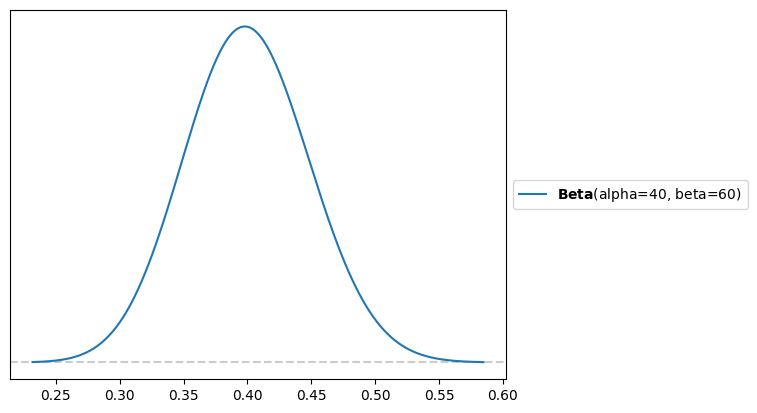

In [5]:
#prediction of bronny making 40/100 shots
pz.Beta(alpha=40,beta=60).plot_pdf()

In [6]:
#store the prior distribution for the FG percentage
FG_prior = pz.Beta(alpha=40,beta=60)

FG_prior_mode = (FG_prior.alpha - 1)/(FG_prior.alpha + FG_prior.beta - 2)

#the mean is the shooting percentage I'm predicting based on my knowledge of Lebron
FG_prior.mean(), FG_prior.median(), FG_prior_mode

(0.4, 0.3993307439904112, 0.3979591836734694)

<Axes: >

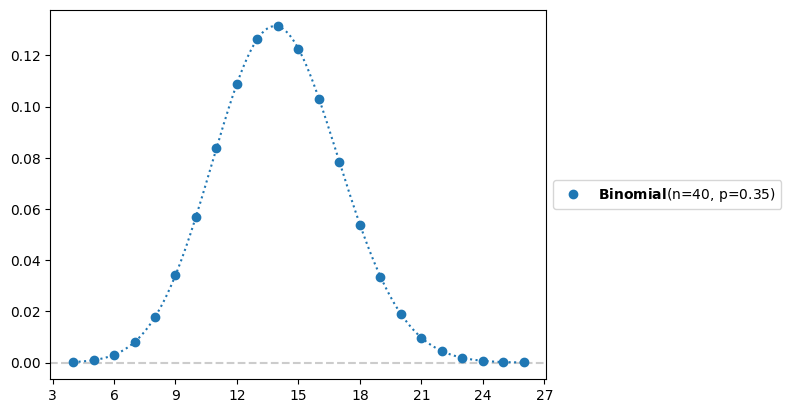

In [7]:
#actual data from summer league
pz.Binomial(n = 40, p = 14/40 ).plot_pdf()

In [13]:
#prior information
alpha_old = 40
beta_old = 60

#likelihood info, or data from the Summer League
k = 14 #makes
n = 40 #total attempts

expected_FG = pz.Beta(alpha = alpha_old + k,beta = beta_old + n - k )
expected_FG.mean()

0.38571428571428573

<Axes: >

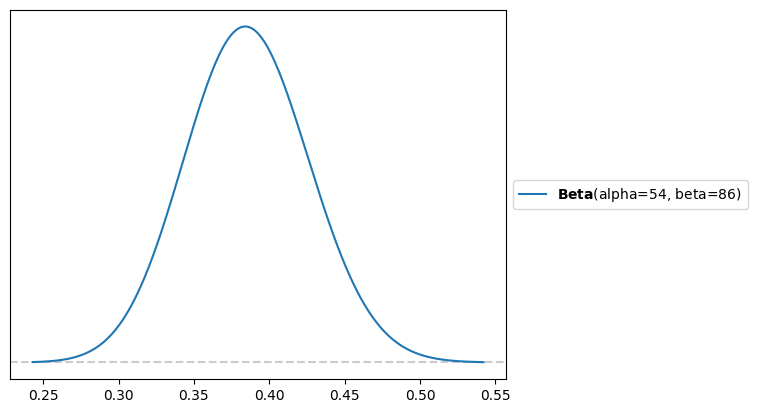

In [14]:
expected_FG.plot_pdf()

In [24]:
#turns summer league data into array
FG_data = np.repeat([1,0], repeats = [14,26])

In [23]:
with pm.Model() as brny_FG_model:
  #define the prior with made up data
  θ = pm.Beta('θ' , alpha = 40. , beta = 60.)

  #define the likelihood, which is how we process the shots we've seen Bronny make in the Summer league
  y = pm.Bernoulli('y', p = θ, observed = FG_data)

  #same from Posterior
  idata_FG = pm.sample(1000)

<Axes: title={'center': 'θ'}>

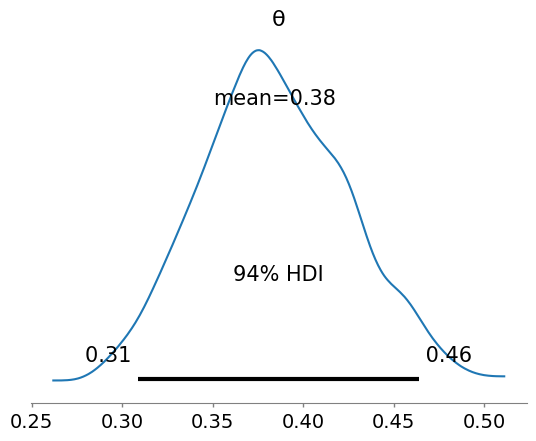

In [25]:
#vizualize the 1000 samples from the pymc model of the posterior
az.plot_posterior(idata_FG)

<Axes: >

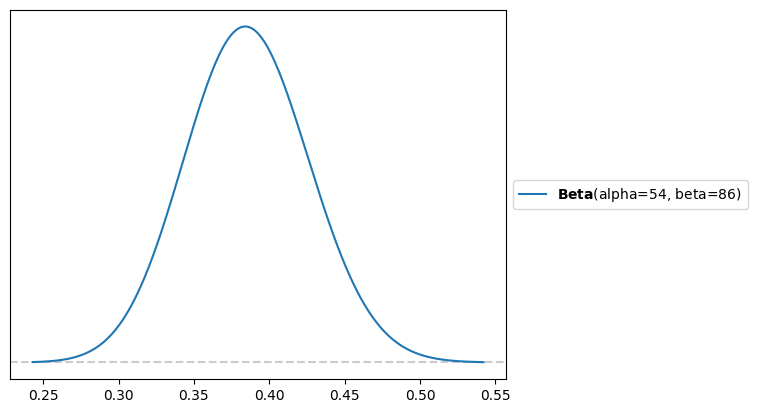

In [26]:
expected_FG.plot_pdf()

<Axes: title={'center': 'θ'}>

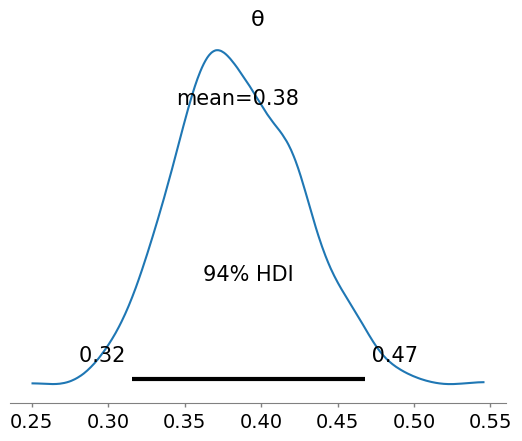

In [27]:
#vizualize 1000 samples from the analytic model.
az.plot_posterior( {'θ' : expected_FG.rvs(1000)} )

**Conclusion:**

I think the percentage will be higher than 38%, probably more like 42%. I chose 42 because it is halfway between 38 and 46 and 46% is at the high end of the 94% HDI, meaning it is still a good chance. I think his shooting percentage will be higher because in the summer league, Bronny has been facing insane pressure to live up to his father's GOAT status. I think this has been hurting his performance and I think once he gets less focused on by the media, he will play better. I do believe 38% is still a very reasonable prediction of his percentage.

In [28]:
#Generate predictions for next 1000 FG attempts from Bronny

pm.sample_posterior_predictive(idata_FG, model=brny_FG_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [29]:
#stack the two MCMC chains together
stacked_FG = az.extract(idata_FG, group="posterior_predictive")

stacked_FG.sel(sample=0).sel(draw=0).y.to_series().values

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])